In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import LabelEncoder
import matplotlib



In [2]:
data=pd.read_csv('pre_processed_data.csv')
# Pre_processed_data.csv is the file which is used for visualizations.
data=pd.read_csv('pre_processed_data.csv')
map_age_to_age_groups={'0':'0-2','1':'0-2','2':'0-2','3':'3-5','4':'3-5','5':'3-5','6':'6-11','7':'6-11','8':'6-11','9':'6-11','10':'6-11','11':'6-11'}
data['Child_age_groups']=data['Child_age_0_11'].map(map_age_to_age_groups)


In [3]:
#class for conventional plots
class GetVisualization:
    '''
    A class which is used to generate visualizations
    
    Usage :
    -------------------------------------------------------------------------------------------------------------------------------------------------------------------
     >>>class_object= GetVisualization(dataframe) - Pass the dataframe which you want to visualize
     
     >>>>>generated_plot= class_object.categoricalPlot(**kwargs) - Pass all the necessary parameters for seaborn catplot like x,y,hue,kind,aspect,height,order
     
     >>>>>generated_plot= class_object.countPlot(**kwargs) - Can be used if you want to customize the graphs into axes else use categoricalPlot.
     
     >>>>>generated_plot=class_object.pieChart(list_of_values,**kwargs) - Used for plotting a pie chart where list of values is the value_counts of the specific column,
                                                                        Kwargs include parameters labels,autopct, explode
    
     >>>>>generated_plot=class_object.heatMap(**kwargs) - Plots a heatmap of the dataframe you instantiated with and parameters are annot,fmt
     
     If we want to change the title and the labels of the default implementation
     
     >>>>>generated_plot= class_object.changelabelsAndTitle(generated_plot,**kwargs) where Kwargs include title,xlabel,ylabel,xticklabels,yticklabels
     setting the returned value from changelabelsAndTitle to the same generated_plot because we want to update the visulaization instaed of having a new visualization
     -------------------------------------------------------------------------------------------------------------------------------------------------------------------
    '''  
    def __init__(self,dataframe):
        '''
        Initializing the class with a dataframe. Doing so will allow us to have a centralized control over each plot
        
        '''
        assert isinstance(dataframe,pd.DataFrame),'Provide a dataframe instance'
        
        self.dataframe=dataframe
    
    def categoricalPlot(self,**kwargs):
        '''
        Generates a seaborn cat plot using the parameters. Takes the input parameters which a normal seaborn catplot takes
        Args:
            x,y,hue (str) : Strings corresponding to column names we want to visualize
            aspect, height (int) : parameters related to height and width of the figure
            kind (str) : type of plot we want to visualize
        Returns:
            seaborn.axisgrid.FacetGrid object
        '''
        
        g=sns.catplot(x=kwargs.get('x',None),y=kwargs.get('y',None),hue=kwargs.get('hue',None),aspect=kwargs.get('aspect',1),height=kwargs.get('height',5),kind=kwargs.get('kind',None),data=self.dataframe,order=kwargs.get('order',None))
        
        return g
    
    def countPlot(self,**kwargs):
        '''
        Generates a seaborn countt plot using the parameters. Takes the input parameters which a normal seaborn catplot takes
        Args:
            x,y,hue (str) : Strings corresponding to column names we want to visualize
            aspect, height (int) : parameters related to height and width of the figure
            kind (str) : type of plot we want to visualize
        Returns:
            matplotlib.axes object
        '''
        
        g=sns.countplot(x=kwargs.get('x',None),y=kwargs.get('y',None),hue=kwargs.get('hue',None),ax=kwargs.get('ax',None),data=self.dataframe,order=kwargs.get('order',None),width=kwargs.get('width',0.8))
        
        return g
    
    def changelabelsAndTitle(self,fig_obj,**kwargs):
        '''
        Changes the title and axis labels of the facetegrid object. MAKE SURE that the parameters xlabel,ylabel,xticklabels,yticklabels and title is passed else default values will be imputed
        Args:
            fig_obj (seaborn.axisgrid.FacetGrid) : A seaborn.axisgrid.FacetGrid object to which modfications needs to be applied
        Returns :
            seaborn.axisgrid.FacetGrid after updating the necessary labels and title as specified by the input kwargs
        
        '''
        assert isinstance(fig_obj,(sns.axisgrid.FacetGrid,matplotlib.axes._axes.Axes)),'You must pass a seaborn facetgrid object'
        
        if isinstance(fig_obj,sns.axisgrid.FacetGrid):
            for ax in fig_obj.axes.flat:
                y_labels=ax.get_yticklabels()
                x_labels=ax.get_xticklabels()
                
            fig_obj.fig.suptitle(kwargs.get('title',None),y=1.03)
            
        elif isinstance(fig_obj,matplotlib.axes._axes.Axes):
            y_labels=fig_obj.get_yticklabels()
            x_labels=fig_obj.get_xticklabels()
            
            fig_obj.set_title(kwargs.get('title',None),y=1.03)
                        
        
        
        fig_obj.set(xlabel=kwargs.get('xlabel',None),ylabel=kwargs.get('ylabel',None),yticklabels=kwargs.get('yticklabels',y_labels),xticklabels=kwargs.get('xticklabels',x_labels))
        
        return fig_obj
    
    def pieChart(self,data,**kwargs):
        '''
        A method that returns a pie chart matplotlib.axes object which uses matplotlib.pyplot
        Args:
            data (list) : List of values that go into the pie chart, generally value_counts of the sepcific column you want to visualize
            Kwargs (dict): Rest of parameters that are used as arguments to plt.pie 
        Returns:
            matplotlib.axes object
        '''
        assert isinstance(data,list),'Provided data is incorrect'
        plt.figure(figsize=kwargs.get('figsize',(10,6)))
        plt.pie(data,labels=kwargs.get('labels',None),autopct=kwargs.get('autopct','%1.0f%%'), explode=kwargs.get('explode',None),pctdistance=kwargs.get('pctdistance',0.6))
        plt.title(kwargs.get('title',None))
        
        return plt
    
    def heatMap(self,**kwargs):
        '''
        A metd that retruns a heatmap which is a matplotlib.axes object
        Args:
            kwargs (dict) : parameters that are used as arguments to sns.heatmap
        Returns:
            matplotlib.axes object
        '''
        
        
        return sns.heatmap(self.dataframe, annot=kwargs.get('annot', False), fmt=kwargs.get('fmt', '.1f'))
        
       
    
    def stackedBarWithPercentage(self, data, **kwargs):
        '''
        Generates a stacked bar chart with percentage annotations.
        Args:
            data (pd.DataFrame): DataFrame containing data for the stacked bar chart.
            kwargs (dict): Additional keyword arguments for plot customization.
        Returns:
            matplotlib.axes object
        '''
        assert isinstance(data, pd.DataFrame), 'Provide a pandas DataFrame instance'
        
        # Plotting the stacked bar chart
        plt.figure(figsize=kwargs.get('figsize',(10,6)))
        fig, ax = plt.subplots(figsize=kwargs.get('figsize', (10, 6)))
        data.plot(kind='bar', stacked=True, ax=ax, **kwargs)
        
        # Adding percentage annotations
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

        # Setting plot details
        ax.set_title(kwargs.get('title', 'Stacked Bar Chart with Percentage'), y=1.03, weight='bold', fontsize=14)
        ax.set_xlabel(kwargs.get('xlabel', 'X Label'), weight='bold', fontsize=12)
        ax.set_ylabel(kwargs.get('ylabel', 'Y Label'), weight='bold', fontsize=12)
        ax.legend(title=kwargs.get('legend_title', 'Legend'), loc=kwargs.get('legend_loc', 'upper left'))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=kwargs.get('rotation', 0))

        plt.tight_layout()
        return ax
    

In [4]:
#helper functions
def add_percentage_labels_when_y(plot, feature, ax,max_count,x_val,y_val):
    """
    It take the figure objects and calculates the perecntage of the corresponding bar value based on the points inferred from the plot 
    In this function we annotate the labels when the (grouped)  bars are aligned on y axis
    Args:
        plot (seaborn.axisgrid.FacetGrid) : The figure or axes object 
        feature ('string') : The feature name or the axis where we want to add the percenatge labels
        ax (matplotlib.pyplot.gca()) : Get Current axes object generated from the visualization
        max_count (int) : It is generally the total no. of data points which is used for calculating the percenatge of the labels
        x_val (float) : Adjustment of the x position of the percentage annotation on the visualization
        y_val (float) : Adjustment of the y position of the percentage annotation on the visualization
    Returns:
        None - It annotates the plot passed as arguments to the fucntion with percentage values over the bars aligned over y axis
    """
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / max_count)
        x = p.get_x() + p.get_width()
        y = p.get_y()
        if(percentage!='0.0%'):
            ax.annotate(percentage, (x+x_val, y+y_val), fontsize=10, color='black')
            
def add_percentage_labels_when_x(plot, feature, ax,max_count,y_val):
    """
    It take the figure objects and calculates the perecntage of the corresponding bar value based on the points inferred from the plot 
    The only difference of this function from the above add_percentage_labels_when_y is, the orientation of the visualization.
    That is in this function we annotate the labels when the (grouped) bars are aligned on x axis
    Args:
        plot (seaborn.axisgrid.FacetGrid) : The figure or axes object 
        feature ('string') : The feature name or the axis where we want to add the percenatge labels
        ax (matplotlib.pyplot.gca()) : Get Current axes object generated from the visualization
        max_count (int) : It is generally the total no. of data points which is used for calculating the percenatge of the labels
        x_val (float) : Adjustment of the x position of the percentage annotation on the visualization
        y_val (float) : Adjustment of the y position of the percentage annotation on the visualization
    Returns:
        None - It annotates the plot passed as arguments to the fucntion with percentage values over the bars aligned over x axis
    """
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / max_count)
        x = p.get_x()
        y = p.get_height()
        if(percentage!='0.0%'):
            ax.annotate(percentage, (x, y+y_val), fontsize=10, color='black')
            
            
def plot_parent_monitoring_percentage(df, columns, y_labels=None, titles=None,image_name='parent_monitoring.png'):
    '''
    plots parent monitoring percentage
    args - 
        df - dataframe
        columns - list of columns
        y_labels - list of y labels
        titles - list of titles
        image_name - name of the image to be saved
    returns - saves image
    
    '''
    
    assert isinstance(df, pd.DataFrame), 'Provide a pandas DataFrame instance'
    assert isinstance(columns, list), 'Provide a list of columns'
    assert isinstance(y_labels, list) or y_labels is None, 'Provide a list of y labels or None'
    assert isinstance(titles, list) or titles is None, 'Provide a list of titles or None'
    assert len(columns) == len(y_labels) or y_labels is None, 'Length of columns and y_labels should be same'
    assert len(columns) == len(titles) or titles is None, 'Length of columns and titles should be same'
    assert isinstance(image_name, str), 'Provide a string for image_name'
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(10, 5))

    for i, column in enumerate(columns):
        # Counting the occurrences of 'Yes, I do this' for each race
        yes_counts = df[df[column] == 'Yes, I do this'].groupby('P_race').size()
        total_counts = df.groupby('P_race').size()
    
        # Calculating total percentages for 'Yes, I do this'
        yes_percentages = (yes_counts / total_counts) * 100

        # Sorting
        yes_percentages_sorted = yes_percentages.sort_values()

        # Excluding 'Refused' category
        yes_percentages_sorted = yes_percentages_sorted[yes_percentages_sorted.index != 'Refused']

        # Plotting the bar graph 
        bars = yes_percentages_sorted.plot(kind='bar', ax=axes[i])
        bars.set_ylabel(y_labels[i] if y_labels else 'Percentage of parents who monitor their children')
        bars.set_xlabel('Parent Race')
        bars.set_title(titles[i] if titles else f'Percentage of {column} by Parent Race')
        bars.set_xticklabels(yes_percentages_sorted.index, rotation=0)

        # Adding percentage annotations
        for j, percentage in enumerate(yes_percentages_sorted):
            axes[i].text(j, percentage , f'{percentage:.2f}%', ha='center', fontsize=10)

    plt.tight_layout()
    plt.savefig(image_name)
    
    
    
def plot_social_media_by_age(data,image_name='social_media_by_age.png'):
    '''
    plots social media usage by age in a single plot
    args - 
        data - dataframe
        image_name - name of the image to be saved
    returns- 
        plots the chart
    
    '''
    assert isinstance(data,pd.DataFrame),'Provide a dataframe instance'
    assert isinstance(image_name, str), 'Provide a string for image_name'
    map_age_to_age_groups = {'0': '0-2', '1': '0-2', '2': '0-2', '3': '3-5', '4': '3-5', '5': '3-5',
                             '6': '6-8', '7': '6-8', '8': '6-8', '9': '9-11', '10': '9-11', '11': '9-11'}
    data['Child_age_groups'] = data['Child_age_0_11'].map(map_age_to_age_groups)
    social_media_columns = ['CHSO_facebook', 'CHSO_instagram', 'CHSO_snapchat', 'CHSO_tiktok', 'CHSO_other_websites', 'Uses_youtube','Child_age_groups']
    social_media_data = data[social_media_columns].copy()  # Create a copy of the DataFrame
    
    # Convert categorical columns to numerical values for analysis
    social_media_data.replace({'No, my child does not use this': 0, 'Yes, my child uses this': 1, 'Refused': None, 'Missing': None}, inplace=True)
    
    social_media_data.replace({'No, my child does not watch videos on YouTube': 0, 'Yes, my child watches videos on YouTube': 1, 'Refused': None, 'Missing': None}, inplace=True)

    # Get percentages for each social media platform
    platforms = ['CHSO_facebook', 'CHSO_instagram', 'CHSO_snapchat', 'CHSO_tiktok', 'CHSO_other_websites','Uses_youtube']
    platforms_short_form = ['Facebook', 'Instagram', 'Snapchat', 'TikTok', 'Other Websites','Youtube']
    plt.figure(figsize=(15, 10))

    for i, platform in enumerate(platforms, 1):
    
        total_users = social_media_data['Child_age_groups'].value_counts()

        platform_users = social_media_data[social_media_data[platform] == 1]
        platform_users_count = platform_users['Child_age_groups'].value_counts()
    
        total_platform_users = platform_users_count.sum()
        percentages = (platform_users_count / total_users) * 100
        # print("percentages",percentages)
        plt.subplot(2, 3, i)
        ax = sns.barplot(x=percentages.index, y=percentages.values)
        
        ax.set_title(f'Percentage of Children Using {platforms_short_form[i-1]} by Age')
        ax.set_xlabel('Child Age (0-11)')
        ax.set_ylabel(f'% of children using {platforms_short_form[i-1]}')
        ax.set_ylim(0, 100)

        for index, value in enumerate(percentages):
            plt.text(index, value + 2, f'{value:.2f}%', ha='center')

    plt.tight_layout()
    plt.suptitle('Social Media Usage by Age Groups', fontsize=16) 
    plt.subplots_adjust(top=0.9) 
    plt.savefig(image_name)
    
    
def plot_job_performance_and_distraction_donut(data,image_name='donut_distraction.png'):
    ''' 
    plots a donut chart of parents doing a fair/poor job and how often they are distracted by their own devices
    args- 
    data - dataframe
    image_name - name of image to be saved
    returns - 
    plots the chart
    
    '''
    assert isinstance(data,pd.DataFrame),'Provide a dataframe instance'
    assert isinstance(image_name, str), 'Provide a string for image_name'
    condition_total_fair_poor = data[data['Time_spent_together'].isin(['Only a fair job', 'A poor job'])]
    condition_distracted_fair_poor = condition_total_fair_poor[condition_total_fair_poor['How_often_distracted'].isin(['Often', 'Sometimes'])]

    count_total_fair_poor = condition_total_fair_poor.shape[0]
    count_distracted_fair_poor = condition_distracted_fair_poor.shape[0]
    count_non_distracted_fair_poor = count_total_fair_poor - count_distracted_fair_poor

    percent_distracted_fair_poor = count_distracted_fair_poor / count_total_fair_poor * 100
    percent_non_distracted_fair_poor = count_non_distracted_fair_poor / count_total_fair_poor * 100

    labels = ['Distracted by their own devices', 'Not Distracted by their own devices']
    sizes = [percent_distracted_fair_poor, percent_non_distracted_fair_poor]

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    # Draw a circle in the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.7, color='white', fc='white', linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')
    plt.title('Parents doing a Fair/Poor Job')
    plt.savefig('donut_distraction.png')
    plt.savefig(image_name)
    
    
def plot_horizontal_bar_labels(categories, percentages, figsize=(13, 5), title='Do smartphones have more harm than benefit?',image_name='horizontal_bar_smartphone.png'):
    '''
    plot horizontal bar chart according to categories and percentages
    args - 
    categories - list of categories
    percentages - list of percentages
    figsize - size of the plot
    title - title of the plot
    image_name - name of image to be saved
    
    returns - 
    plots the chart
    '''
    assert isinstance(categories, list), 'Provide a list of categories'
    assert isinstance(percentages, list), 'Provide a list of percentages'
    assert len(categories)==len(percentages), 'Length of categories and percentages should be same'
    assert isinstance(figsize, tuple), 'Provide a tuple for figsize'
    assert isinstance(title, str), 'Provide a string for title'
    assert isinstance(image_name, str), 'Provide a string for image_name'
    plt.figure(figsize=figsize)
    plt.barh(categories, percentages)
    plt.xlabel('Percentage')
    plt.title(title)

    # Adding the data labels
    for index, value in enumerate(percentages):
        
        plt.text(value, index, f' {value:.1f}%', va='center')

    plt.tight_layout()
    plt.savefig(image_name)
   

**Visualizations for the Presentation**


Visualization 1

<Figure size 1000x600 with 0 Axes>

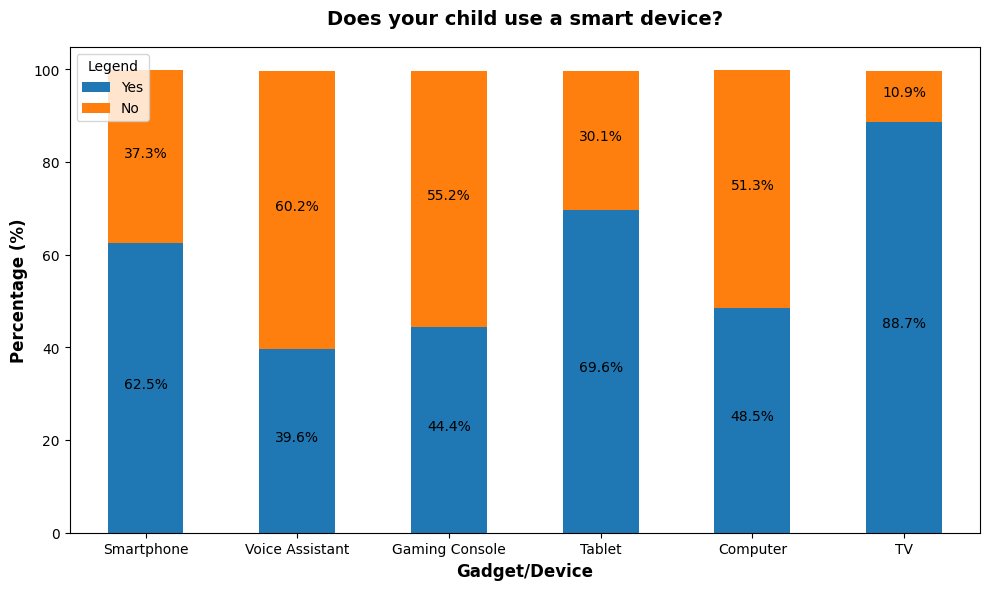

In [5]:
columns_of_interest = ['CHD_smartphone', 'CHD_voice_assistant', 'CHD_gaming_console', 'CHD_tablet', 'CHD_computer', 'CHD_tv']
display_column_names = {'CHD_smartphone': 'Smartphone', 'CHD_voice_assistant': 'Voice Assistant', 'CHD_gaming_console': 'Gaming Console', 'CHD_tablet': 'Tablet', 'CHD_computer': 'Computer', 'CHD_tv': 'TV'}
data_selected = data[columns_of_interest].rename(columns=display_column_names)

# Calculating the percentage of 'Yes' and 'No' for each column
percentages = {}
for col in display_column_names.values():
    counts = data_selected[col].value_counts(normalize=True)
    percentages[col] = {
        'Yes': counts.get('Yes, my child uses or interacts with this', 0) * 100,
        'No': counts.get('No, my child does not use or interact with this', 0) * 100
    }

# Creating a DataFrame for easy plotting
percentages_df = pd.DataFrame(percentages).T

class_object = GetVisualization(percentages_df)
generated_plot = class_object.stackedBarWithPercentage(
    data=percentages_df,
    figsize=(10, 6),
    title="Does your child use a smart device?",
    xlabel='Gadget/Device',
    ylabel='Percentage (%)'
)


plt.savefig('visualization1_child_uses_device.png')

Visualization 2

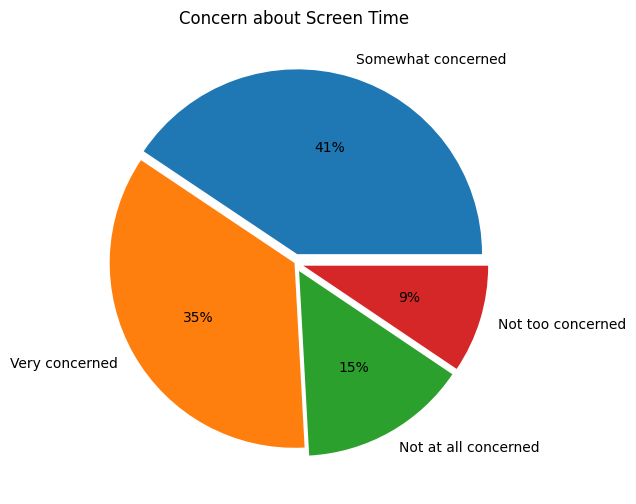

In [6]:
pieObject=GetVisualization(data)
# Generating a pieChart visualization using the class instance
concern_abt_screen_time=pieObject.pieChart(data[data['CO_screen_time']!='Refused']['CO_screen_time'].value_counts().tolist(),labels=data[data['CO_screen_time']!='Refused']['CO_screen_time'].dropna().unique().tolist(),autopct='%1.0f%%',title='Concern about Screen Time',explode=[0.05,0,0.05,0.05])
# concern_abt_screen_time.figure()
concern_abt_screen_time.savefig('visualization2_screen_time.png')


Visualization 3

d:\Fall23\ECE143\Project\Parenting-children-in-the-age-of-screens\.venv\lib\site-packages\seaborn\axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


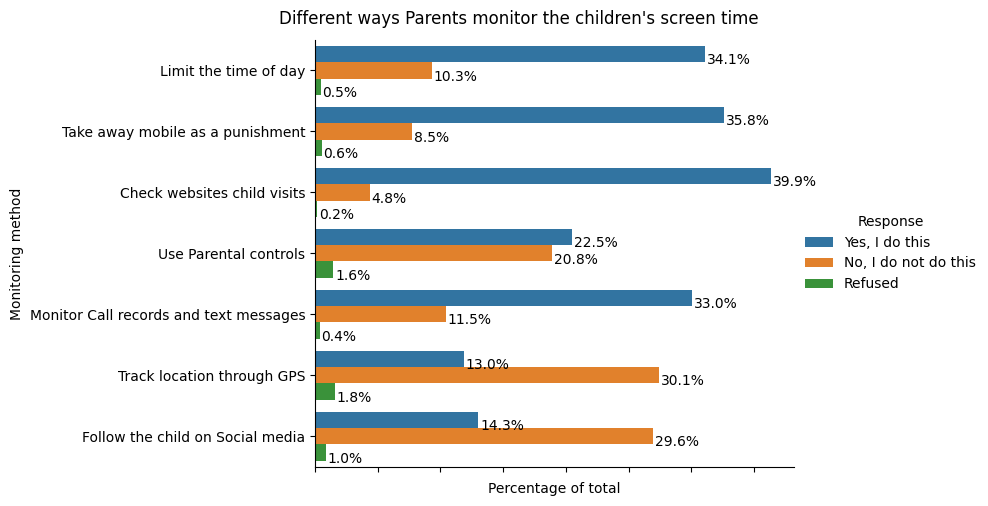

In [7]:
# Using dataframe.melt on specific columns to instantiate the class object intsead of suing the entire dataframe
monitor_df=data[['MNT_websites','MNT_take_away_mobile','MNT_screentime','MNT_call_records','MNT_parental_controls','MNT_socialmedia','MNT_gps']].melt(var_name='monitor_child_activities',value_name='Response')

# Class instantiation
monitor_activities=GetVisualization(monitor_df)

# Generating a catplot visualization using the class instance
monitor_activities_plot=monitor_activities.categoricalPlot(y='monitor_child_activities',hue='Response',kind='count',aspect=1.5)

# Updating the labels of the visualization using a class method
monitor_activities_plot=monitor_activities.changelabelsAndTitle(monitor_activities_plot,title="Different ways Parents monitor the children's screen time",yticklabels=['Limit the time of day','Take away mobile as a punishment','Check websites child visits','Use Parental controls','Monitor Call records and text messages','Track location through GPS','Follow the child on Social media'],xlabel='Percentage of total',ylabel='Monitoring method',xticklabels='')

# Adding annotations to the visulaization
add_percentage_labels_when_y(monitor_activities_plot,'monitor_child_activities',plt.gca(),len(data),5,0.3)
monitor_activities_plot.savefig('visualization3_monitoring.png')

Visualization 4

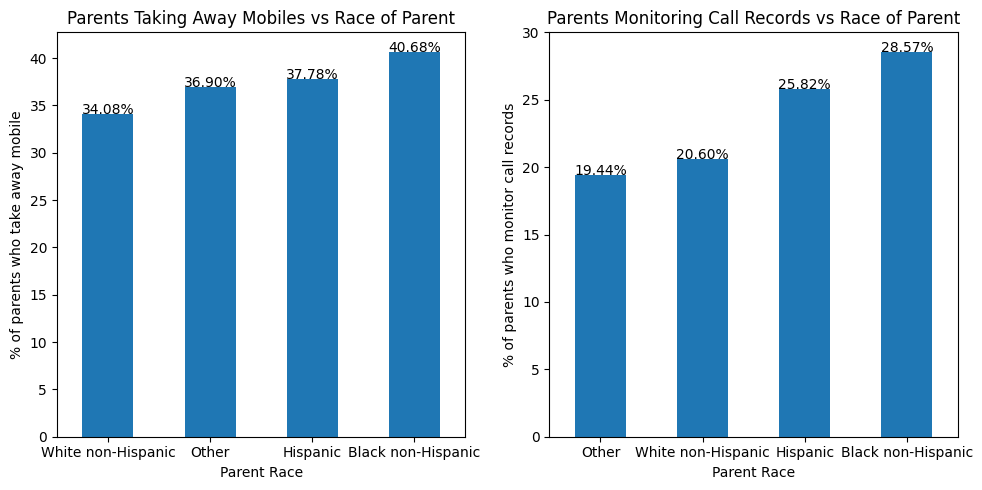

In [8]:
df = pd.DataFrame(data)

columns_to_analyze = [ 'MNT_take_away_mobile', 'MNT_call_records']
custom_y_labels = ['% of parents who take away mobile', '% of parents who monitor call records']
custom_titles = ['Parents Taking Away Mobiles vs Race of Parent', 'Parents Monitoring Call Records vs Race of Parent']

plot_parent_monitoring_percentage(df, columns_to_analyze, custom_y_labels, custom_titles,'visualization4_monitoring.png')


Visualization 5

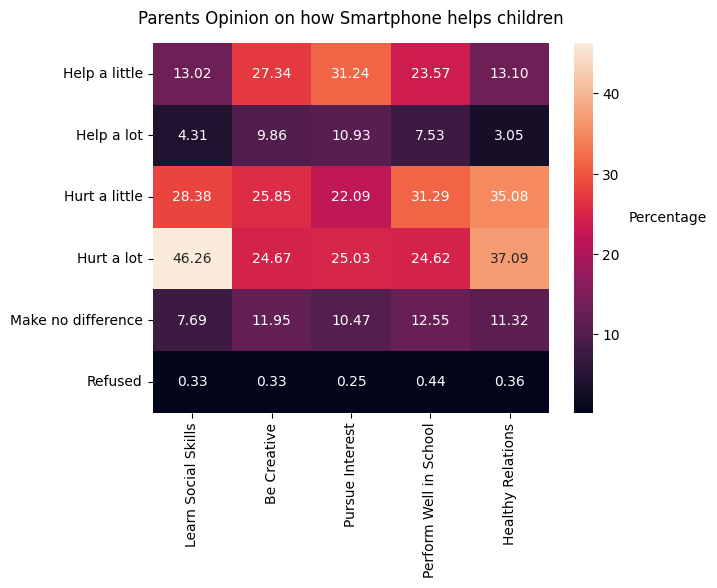

In [9]:
fig = plt.figure()
# Using dataframe.melt on specific columns to instantiate the class object intsead of suing the entire dataframe
opinion_df=data[['ML_learn_social_skills','ML_be_creative','ML_pursue_interest','ML_do_well_in_school','ML_healthy_frienships']].apply(pd.Series.value_counts).apply(lambda x: x/x.sum()*100)

# Class instantiation
opinion=GetVisualization(opinion_df)

# Generating a heatmap visualization using the class instance
opinion_plot=opinion.heatMap(annot=True,fmt='.2f')

# Updating the labels of the visualization using a class method
opinion_plot=opinion.changelabelsAndTitle(opinion_plot,title='Parents Opinion on how Smartphone helps children',xticklabels=['Learn Social Skills','Be Creative','Pursue Interest','Perform Well in School','Healthy Relations'])

# Adding extra customization which is not implemented in the class
opinion_plot.text(6,2.9,'Percentage')

fig.savefig('visualization5_opinion.png')


Visualization 6

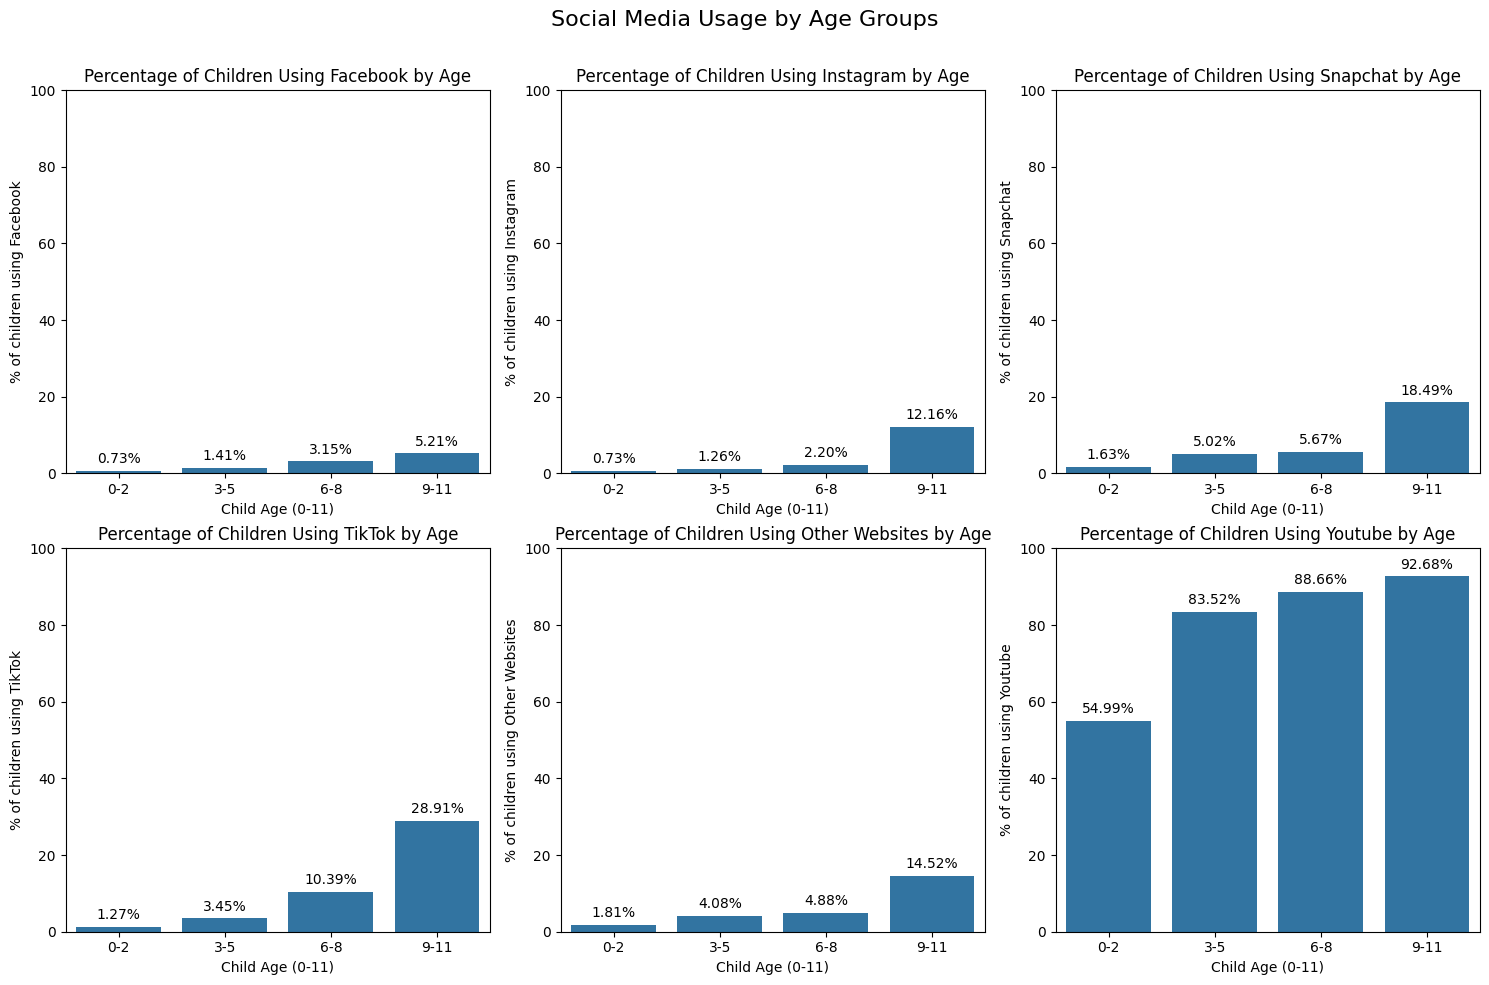

In [10]:
plot_social_media_by_age(data,'visualization6_social_media.png')


Visualization 7

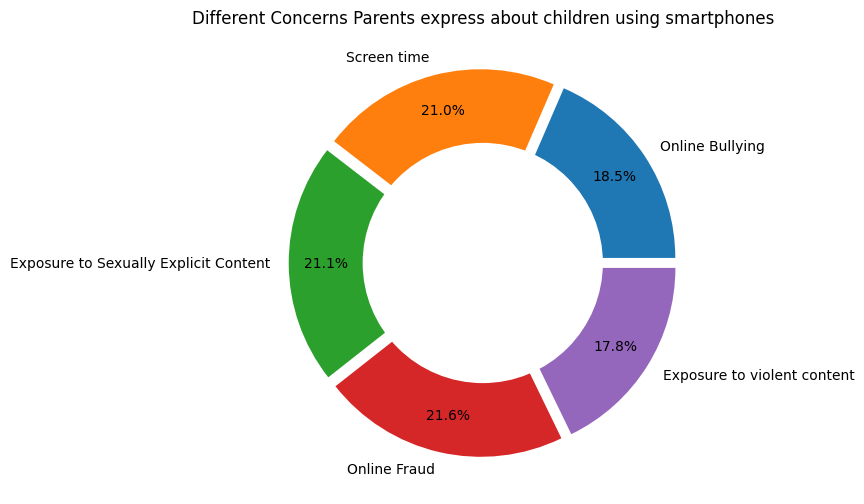

In [11]:
major_concern_df=data[['CO_online_bully','CO_screen_time','CO_sexual_explicit_content','CO_online_fraud','CO_violent_content']].apply(lambda x:len(x.loc[x=='Very concerned']))
major_concern_plot=pieObject.pieChart(major_concern_df.values.tolist(),labels=['Online Bullying','Screen time','Exposure to Sexually Explicit Content','Online Fraud','Exposure to violent content'],autopct='%0.1f%%',pctdistance=0.80,explode=[0.05, 0.05, 0.05, 0.05, 0.05],title='Different Concerns Parents express about children using smartphones')


hole = major_concern_plot.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.savefig('visualization7_concerns.png')

Visualization 8

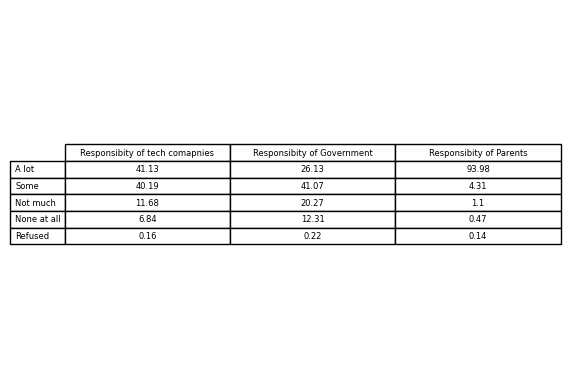

In [12]:
tech=(data['RE_tech_companies'].value_counts(normalize=True)*100).round(2).to_frame()
tech.index.name='Amount of responsibility'
tech.columns=['Responsibity of tech comapnies']

govt=(data['RE_government'].value_counts(normalize=True)*100).round(2).to_frame()
govt.index.name='Amount of responsibility'
govt.columns=['Responsibity of Government']

parents=(data['RE_parents'].value_counts(normalize=True)*100).round(2).to_frame()
parents.index.name='Amount of responsibility'
parents.columns=['Responsibity of Parents']

responsibility=tech.merge(govt,on='Amount of responsibility').merge(parents,on='Amount of responsibility')

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')


table = ax.table(cellText=responsibility.values, colLabels=responsibility.columns, rowLabels=responsibility.index, loc='center', cellLoc='center')



plt.savefig('visualization8_responsibility_table.png', bbox_inches='tight', pad_inches=0.5)


Visualization 9

d:\Fall23\ECE143\Project\Parenting-children-in-the-age-of-screens\.venv\lib\site-packages\seaborn\axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


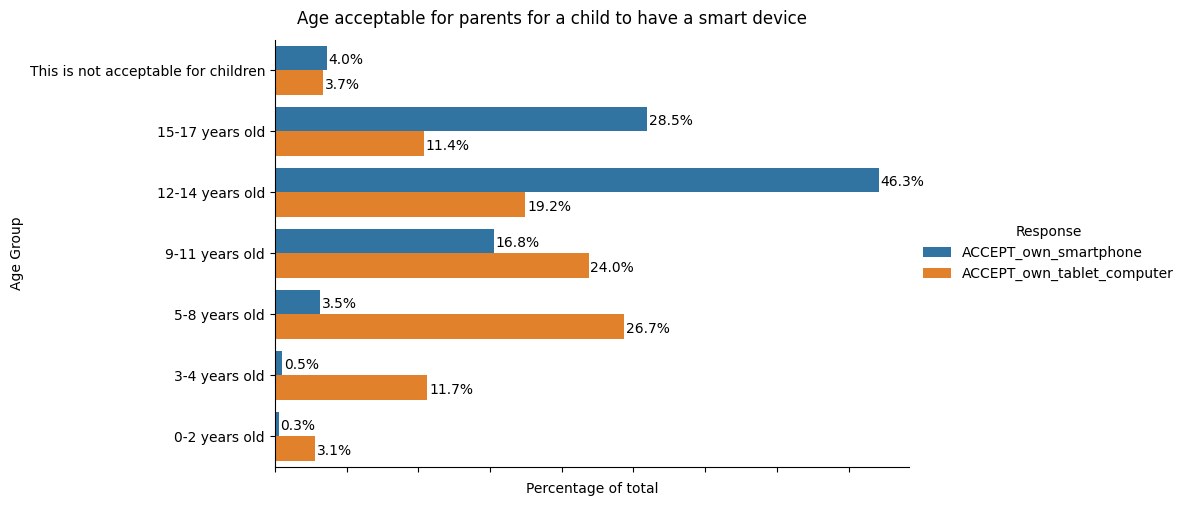

In [13]:
# Using dataframe.melt on specific columns to instantiate the class object intsead of suing the entire dataframe
acceptable_age_df=data[['ACCEPT_own_smartphone','ACCEPT_own_tablet_computer']].melt(value_name='Accept_having _smartphone',var_name='Response')

# Class instantiation
acceptable_age=GetVisualization(acceptable_age_df)

# Generating a catplot visualization using the class instance
acceptable_age_plot=acceptable_age.categoricalPlot(y='Accept_having _smartphone',hue='Response',kind='count',height=5,aspect=2,order=['0-2 years old','3-4 years old', '5-8 years old','9-11 years old','12-14 years old','15-17 years old','This is not acceptable for children',][::-1])

# Updating the labels of the visualization using a class method
acceptable_age_plot=acceptable_age.changelabelsAndTitle(acceptable_age_plot,title='Age acceptable for parents for a child to have a smart device',xticklabels='',xlabel='Percentage of total',ylabel='Age Group')

# Adding annotations to the visulaization
add_percentage_labels_when_y(acceptable_age_plot,'Accept_having _smartphone',plt.gca(),len(data),5,0.3)
acceptable_age_plot.savefig('visualization9_acceptable_age.png')

Visualization 10

d:\Fall23\ECE143\Project\Parenting-children-in-the-age-of-screens\.venv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Fall23\ECE143\Project\Parenting-children-in-the-age-of-screens\.venv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Fall23\ECE143\Project\Parenting-children-in-the-age-of-screens\.venv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Fall23\ECE143\Project\Parenting-children-in-the-age-of-screens\.venv\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 31.7% of the points cannot be placed; you may want to d

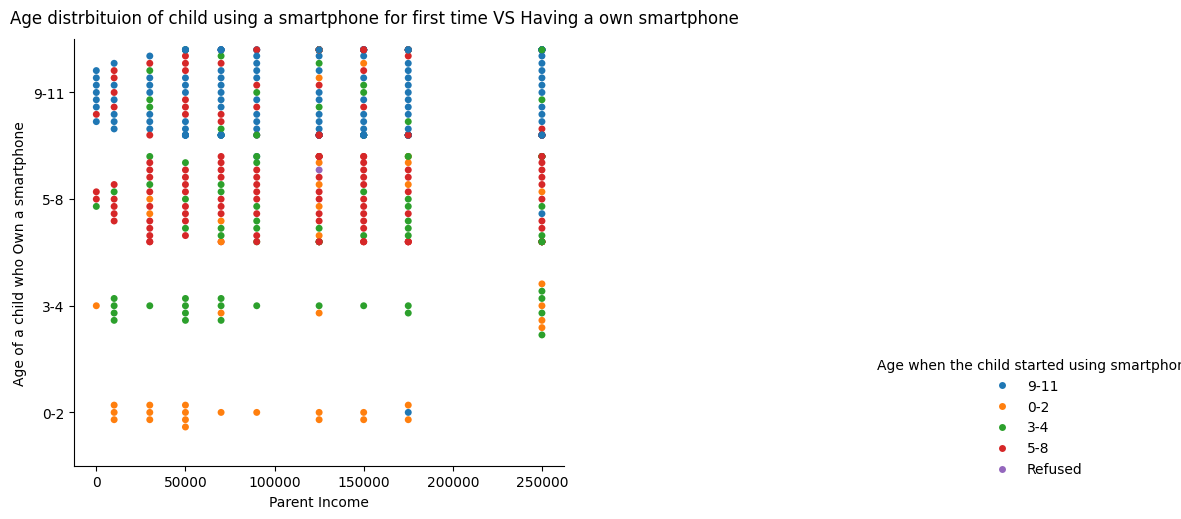

In [14]:
# Generating a catplot visualization using the class instance
own_smartphone_plot=pieObject.categoricalPlot(kind='swarm',y='Child_owns_smartphone_age',x='P_income',order=['9-11','5-8','3-4','0-2'],hue='Child_first_age_smartphone',aspect=1.2) 

# Updating the labels of the visualization using a class method
own_smartphone_plot=pieObject.changelabelsAndTitle(own_smartphone_plot,xlabel='Parent Income',ylabel='Age of a child who Own a smartphone',title='Age distrbituion of child using a smartphone for first time VS Having a own smartphone')

# Adding extra customizations which is not implemented in the class
own_smartphone_plot._legend.set(title='Age when the child started using smartphone',loc='lower right',bbox_to_anchor=(1.5,0.06))
own_smartphone_plot.savefig('visualization10_own_smartphone.png')

Visualization 11


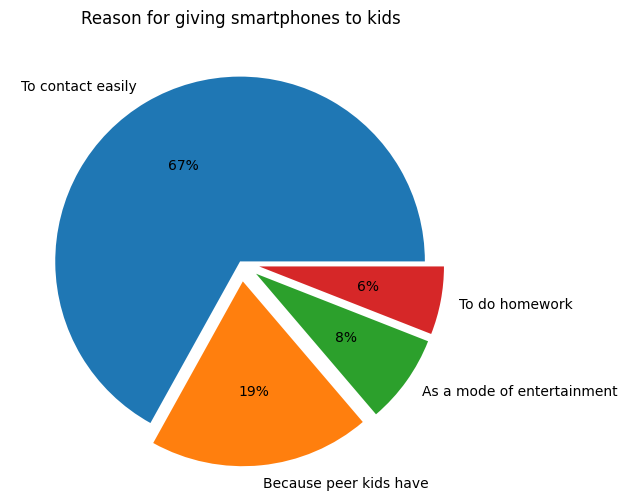

In [15]:
# Using dataframe.melt on specific columns to instantiate the class object intsead of suing the entire dataframe
major_reason_df=data[['RS_to_contact', 'RS_peer_kids_have','RS_entertainment','RS_to_do_homework']].melt(var_name='Reason',value_name='response')
major_reason_df=major_reason_df.loc[major_reason_df['response']=='Major reason']

# Generating a pieChart visualization using the class instance
major_reason_for_giving_smartphones=pieObject.pieChart(major_reason_df['Reason'].value_counts().tolist(),labels=['To contact easily','Because peer kids have','As a mode of entertainment','To do homework'],autopct='%1.0f%%',explode=[0.01, 0.1, 0.1, 0.1],title='Reason for giving smartphones to kids')
major_reason_for_giving_smartphones.savefig('visualization11_reason_for_giving_smartphones.png')


Visualization 12


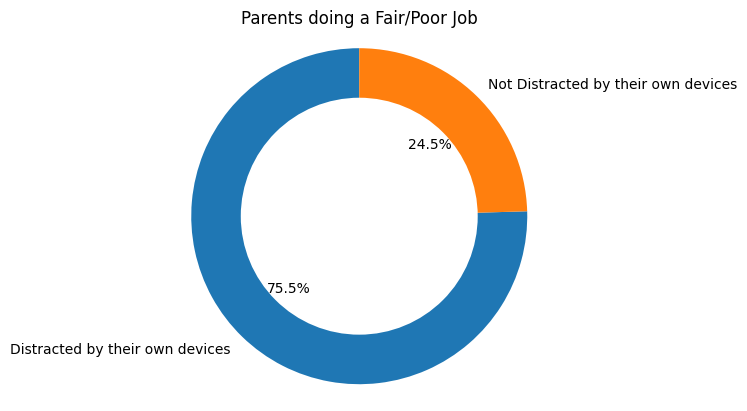

In [16]:
plot_job_performance_and_distraction_donut(data,'visualization12_distraction_parents.png')

Visualization 13


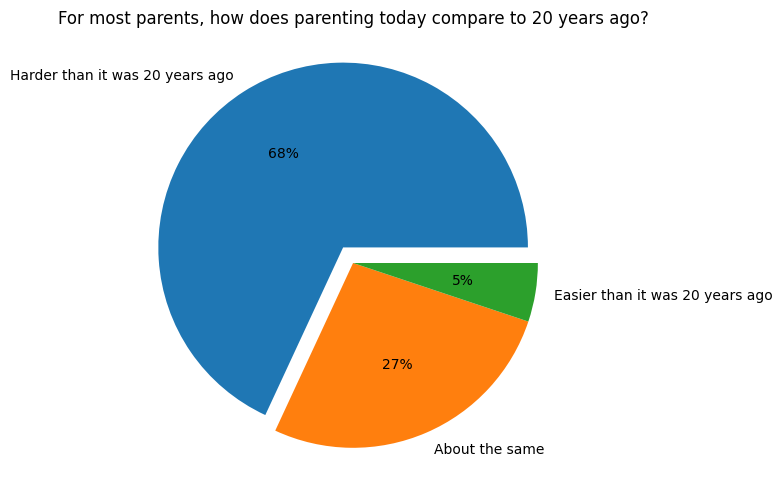

In [17]:

# Generating a pieChart visualization using the class instance
present_days_parenting=pieObject.pieChart(data[data['How_is_curret_days_parenting']!='Refused']['How_is_curret_days_parenting'].value_counts().tolist(),labels=data[data['How_is_curret_days_parenting']!='Refused']['How_is_curret_days_parenting'].unique().tolist(),autopct='%1.0f%%',title='For most parents, how does parenting today compare to 20 years ago?',explode=[0.1,0,0])
present_days_parenting.savefig('visualization13_present_days_parenting.png')

Visualization 14


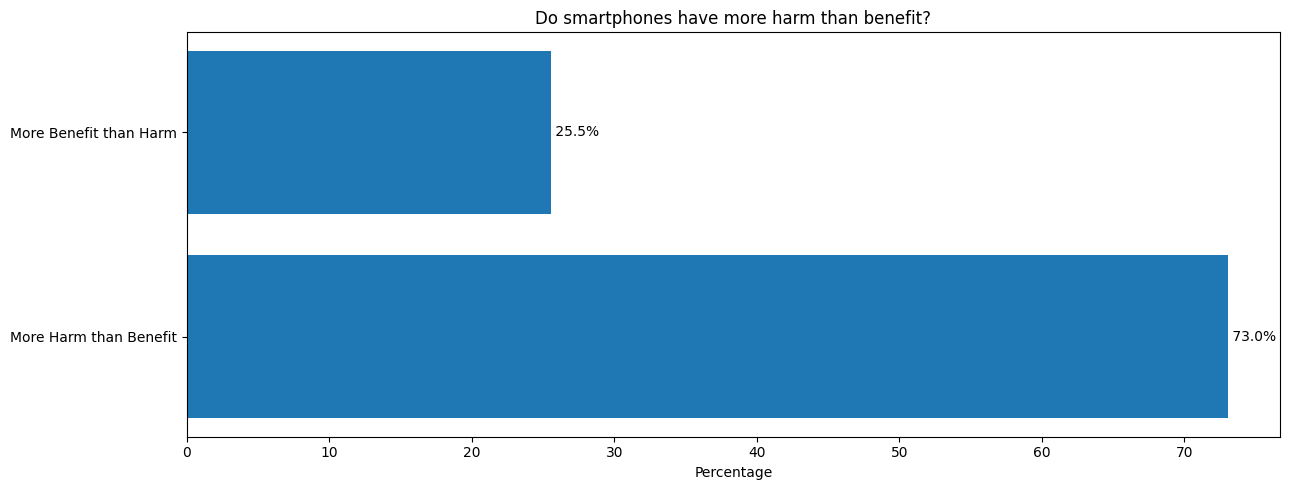

In [18]:
categories = ['More Harm than Benefit', 'More Benefit than Harm']

counts = data['Harm_vs_benifits'].value_counts()
total_count = counts.sum()
percentage = counts/total_count*100

percentages = percentage[:-1].to_list()

plot_horizontal_bar_labels(categories, percentages,(13, 5),'Do smartphones have more harm than benefit?','visualization14_harm_vs_benefit.png')